# Анализ тарифов сотовой связи

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег. Необходимо проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


**Описание тарифов**

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей.
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика. 
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 3 рубля
    * сообщение: 3 рубля
    * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1. Ежемесячная плата: 1950 рублей.
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика. 
3. Стоимость услуг сверх тарифного пакета:
    * минута разговора: 1 рубль
    * сообщение: 1 рубль
    * 1 Гб интернет-трафика: 150 рублей


**Ход исследования**

Исследование пройдёт в шесть этапов:
 1. Обзор данных.
 2. Предобработка данных.
 3. Расчеты и добавление данных в таблицу.
 4. Анализ данных.
 5. Проверка гипотез.
 6. Выводы.

## Обзор данных

Откроем таблицы и посмотрим общую информацию о них.

In [1]:
import pandas as pd # импорт библиотеки pandas
import math # импорт библиотеки math
import matplotlib.pyplot as plt # импорт библиотеки matplotlib.pyplot
import numpy as np # импорт библиотеки numpy
from scipy import stats as st # импорт библиотеки scipy stats

In [2]:
calls = pd.read_csv('/datasets/calls.csv') # чтение файла с данными и сохранение в calls
display(calls.head()) # получение первых 5 строк таблицы calls
calls.info() # получение общей информации о данных в таблице calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


В таблице `calls` (информация о звонках) четыре столбца. Типы данных в столбцах разные — float64, int64, object.

Согласно документации к данным:

* `id` — уникальный номер звонка;
* `call_date` — дата звонка;
* `duration` — длительность звонка в минутах;
* `user_id` — идентификатор пользователя, сделавшего звонок.

In [3]:
internet = pd.read_csv('/datasets/internet.csv') # чтение файла с данными и сохранение в internet
display(internet.head()) # получение первых 5 строк таблицы internet
internet.info() # получение общей информации о данных в таблице internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


В таблице `internet` (информация об интернет-сессиях) пять столбцов. Типы данных в столбцах разные — float64, int64, object.

Согласно документации к данным:

* `id` — уникальный номер сессии;
* `mb_used` — объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` — дата интернет-сессии;
* `user_id` — идентификатор пользователя.

... и какой-то неопознанный столбец `Unnamed: 0`.

In [4]:
messages = pd.read_csv('/datasets/messages.csv') # чтение файла с данными и сохранение в messages
display(messages.head()) # получение первых 5 строк таблицы messages
messages.info() # получение общей информации о данных в таблице messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


В таблице `messages` (информация о сообщениях) три столбца. Типы данных в столбцах разные — int64, object.

Согласно документации к данным:

* `id` — уникальный номер сообщения;
* `message_date` — дата сообщения;
* `user_id` — идентификатор пользователя, отправившего сообщение.

In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv') # чтение файла с данными и сохранение в tariffs
display(tariffs.head()) # получение первых 5 строк таблицы tariffs
tariffs.info() # получение общей информации о данных в таблице tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


В таблице `tariffs` (информация о тарифах) восемь столбцов. Типы данных в столбцах разные — int64, object.

Согласно документации к данным:

* `tariff_name` — название тарифа;
* `rub_monthly_fee` — ежемесячная абонентская плата в рублях;
* `minutes_included` — количество минут разговора в месяц, включённых в абонентскую плату;
* `messages_included` — количество сообщений в месяц, включённых в абонентскую плату;
* `mb_per_month_included` — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* `rub_per_minute` — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
* `rub_per_message` — стоимость отправки сообщения сверх тарифного пакета;
* `rub_per_gb` — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта).

In [6]:
users = pd.read_csv('/datasets/users.csv') # чтение файла с данными и сохранение в users
display(users.head()) # получение первых 5 строк таблицы users
users.info() # получение общей информации о данных в таблице users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В таблице `users` (информация о пользователях) восемь столбцов. Типы данных в столбцах разные — int64, object.

Согласно документации к данным:

* `user_id` — уникальный идентификатор пользователя;
* `first_name` — имя пользователя;
* `last_name` — фамилия пользователя;
* `age` — возраст пользователя (годы);
* `reg_date` — дата подключения тарифа (день, месяц, год);
* `churn_date` — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
* `city` — город проживания пользователя;
* `tariff` — название тарифного плана.

**Выводы**

По результатам первичного обзора таблиц можно утверждать, что в некоторых таблицах имеются небольшие проблемы со столбцами и типами данных. Займемся предобработкой данных.

## Предобработка данных

Приведём типы данных в столбцах таблиц к корректному типу. Во всех таблицах данные о времени имеют тип `object`, изменим тип на `datetime`.

In [7]:
calls['call_date'] = pd.to_datetime(calls['call_date']) # изменение типа данных в столбце 'call_date' таблицы 'calls'
internet['session_date'] = pd.to_datetime(internet['session_date']) # изменение типа данных в столбце 'session_date' таблицы 'internet'
messages['message_date'] = pd.to_datetime(messages['message_date']) # изменение типа данных в столбце 'message_date' таблицы 'messages'
users['churn_date'] = pd.to_datetime(users['churn_date']) # изменение типа данных в столбце 'churn_date' таблицы 'users'
users['reg_date'] = pd.to_datetime(users['reg_date']) # изменение типа данных в столбце 'reg_date' таблицы 'users'

In [8]:
calls.info() # проверка
internet.info()
messages.info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), objec

В таблице `internet` присутствует лишний столбец `Unnamed: 0`, избавимся от него.

In [9]:
internet = internet.drop(columns=['Unnamed: 0']) # удаление столбца 'Unnamed: 0'
internet.head() # проверка

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


Мы знаем, что «Мегалайн» всегда округляет секунды до минут для каждого звонка. Округлим соответствующие значения в столбце `duration` в таблице `calls` до большего целого значения.

In [10]:
calls['duration'] = calls['duration'].apply(math.ceil) # округление значений в столбце 'duration' 
calls.head() # проверка 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


## Расчеты и добавление данных в таблицу

Посчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. Для начала сформируем вспомогательный датафрейм `users_tariff` из столбцов 'user_id', 'tariff' и 'city' таблицы `users`, он нам понадобится для составления нужных нам таблиц.

In [11]:
users_tariff = users[['user_id', 'tariff', 'city']] # формирование вспомогательного датафрейма
users_tariff.head() # проверка

,user_id,tariff,city
0,1000,ultra,Краснодар
1,1001,smart,Москва
2,1002,smart,Стерлитамак
3,1003,ultra,Москва
4,1004,ultra,Новокузнецк


Теперь можно проверить за какой диапазон времени представлены данные в таблице `calls`. 

In [12]:
print('Данные в таблице \'calls\' представлены в диапазоне от', min(calls['call_date']), 'до', max(calls['call_date']))

Данные в таблице 'calls' представлены в диапазоне от 2018-01-01 00:00:00 до 2018-12-31 00:00:00


Добавим в таблицу `calls` столбец `call_month`, где будет указан месяц звонка.

In [13]:
calls['month'] = calls['call_date'].dt.month # создание вспомогательного столбца
calls.head() # проверка

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Создадим вспомогательный датафрейм `calls_by_month`, где посчитаем для каждого пользователя количество сделанных звонков по месяцам и их длительность.

In [14]:
calls_by_month = (
    calls
    .pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']) # составление сводной таблицы
    .reset_index() # сброс индексов
)
calls_by_month.columns = ['user_id', 'month', 'calls_count', 'calls_sum'] # переименование столбцов
calls_by_month.head() # проверка

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


Посчитаем для каждого пользователя количество отправленных сообщений по месяцам. Для начала проверим за какой диапазон времени представлены данные в таблице `messages`. 

In [15]:
print('Данные в таблице \'messages\' представлены в диапазоне от', min(messages['message_date']), 'до', max(messages['message_date']))

Данные в таблице 'messages' представлены в диапазоне от 2018-01-02 00:00:00 до 2018-12-31 00:00:00


Добавим в таблицу `messages` столбец `message_month`, где будет указан месяц сообщения.

In [16]:
messages['month'] = messages['message_date'].dt.month # создание вспомогательного столбца
messages.head() # проверка

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим вспомогательный датафрейм `messages_by_month`, где посчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [17]:
messages_by_month = (
    messages
    .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count') # составление сводной таблицы
    .reset_index() # сброс индексов
)
messages_by_month.columns = ['user_id', 'month', 'messages_count'] # переименование столбцов
messages_by_month.head() # проверка

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


Посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам. Для начала проверим за какой диапазон времени представлены данные в таблице `internet`. 

In [18]:
print('Данные в таблице \'internet\' представлены в диапазоне от', min(internet['session_date']), 'до', max(internet['session_date']))

Данные в таблице 'internet' представлены в диапазоне от 2018-01-01 00:00:00 до 2018-12-31 00:00:00


Добавим в таблицу `internet` вспомогательный столбец `session_month`, где будет указан месяц интернет-сессии.

In [19]:
internet['month'] = internet['session_date'].dt.month # создание вспомогательного столбца
internet.head() # проверка

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Создадим вспомогательный датафрейм `internet_by_month`, где посчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [20]:
internet_by_month = (
    internet
    .pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum') # составление сводной таблицы
    .reset_index() # сброс индексов
)
internet_by_month.columns = ['user_id', 'month', 'mb_used'] # переименование столбцов
internet_by_month.head() # проверка

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Посчитаем для каждого пользователя помесячную выручку с каждого пользователя. Создадим основной датафрейм `df`, который и будем использовать для дальнейшей работы. Для этого соединим вспомогательные таблицы `calls_by_month`, `messages_by_month`, `internet_by_month` и `users_tariff`.

In [21]:
df = (
    calls_by_month
    .merge(messages_by_month, how='outer') # объединение вспомогательных таблиц
    .merge(internet_by_month, how='outer') # объединение вспомогательных таблиц
    .merge(users_tariff, how='outer') # объединение вспомогательных таблиц
)
df.head() # проверка

,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,Краснодар
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,Краснодар
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,Краснодар
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,Краснодар
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,Краснодар


Проверим получившийся датафрейм на пропуски.

In [22]:
df.isna().sum() # подсчёт пропусков

user_id             0
month               2
calls_count        42
calls_sum          42
messages_count    499
mb_used            13
tariff              0
city                0
dtype: int64

Пропуски в датафрейме можно объяснить тем, что не все клиенты постоянно используют те или иные виды услуг, также некоторые клиенты могут прекратить пользоваться определенными услугами. Логичнее всего заменить такие пропуски на 0, заодно поменяем тип данных во всех ячейках на `int` так как «Мегалайн» округляет время звонка, количество трафика до целых значений. Но для начала выведем строки с данными, где есть пропуски в столбце `month`.

In [23]:
df.loc[df['month'].isna()] # вывод строк с пропущенными значениями в столбце 'month'

,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city
3214,1128,NaN,NaN,NaN,NaN,NaN,ultra,Волжский
3215,1371,NaN,NaN,NaN,NaN,NaN,smart,Омск


Можно удалить эти строки и сделать замены в оставшихся строках с пропусками.

In [24]:
df = df.dropna(subset=['month']).reset_index(drop=True) # удаление пропущенных значений в столбце 'month' со сбросом индекса
df.isna().sum() # проверка

user_id             0
month               0
calls_count        40
calls_sum          40
messages_count    497
mb_used            11
tariff              0
city                0
dtype: int64

In [25]:
df = df.fillna(0) # замена пропусков на 0
list_columns = ['month', 'calls_count', 'calls_sum', 'messages_count', 'mb_used'] # составление списка нужных столбцов
for i in list_columns: # формирование цикла в списке нужных столбцов
    df[i] = df[i].astype('int') # замена типа чисел с вещественного на целочисленный в нужных столбцах
print(df.isna().sum()) # проверка
df.head() # проверка

user_id           0
month             0
calls_count       0
calls_sum         0
messages_count    0
mb_used           0
tariff            0
city              0
dtype: int64


,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city
0,1000,5,22,159,22,2253,ultra,Краснодар
1,1000,6,43,172,60,23233,ultra,Краснодар
2,1000,7,47,340,75,14003,ultra,Краснодар
3,1000,8,52,408,81,14055,ultra,Краснодар
4,1000,9,58,466,57,14568,ultra,Краснодар


Для расчета помесячной выручки сформируем функцию `billing` внутри которой присвоим переменным значения необходимых столбцов основного датафрейма (минут звонка, сообщений, мегабайт интернет-трафика) и таблицы `tariffs` (размер абонентской платы, количество услуг, входящих в абоненсткую плату, стоимость услуг сверх лимита).

In [26]:
def billing(data):
    
# присвоение переменным значений основного датафрейма 'df'
    calls = data['calls_sum']
    messages = data['messages_count']
    traffic = data['mb_used']
    tariff = data['tariff']
    
# присвоение переменным значений таблицы 'tariffs'    
    calls_cost = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_minute'])
    messages_cost = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_message'])
    internet_cost = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_gb'])
    tariff_cost = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee'])
    messages_incl = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'messages_included'])
    calls_incl = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'minutes_included'])
    traffic_incl = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'mb_per_month_included'])
    
# расчет месячной выручки для каждого пользователя    
    bill = (
        math.ceil(max(calls - calls_incl, 0)) * int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_minute']) +
        max(messages - messages_incl, 0) * int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_message']) +
        math.ceil(max(traffic - traffic_incl, 0) / 1024) * int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_gb']) +
        int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee'])
    )
    
    return bill

Добавим столбец 'bill' с расчетом помесячной выручки при помощи функции 'billing'.

In [27]:
df['bill'] = df.apply(billing, axis=1) # добавление столбца 'bill' 
df.head() # проверка

,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city,bill
0,1000,5,22,159,22,2253,ultra,Краснодар,1950
1,1000,6,43,172,60,23233,ultra,Краснодар,1950
2,1000,7,47,340,75,14003,ultra,Краснодар,1950
3,1000,8,52,408,81,14055,ultra,Краснодар,1950
4,1000,9,58,466,57,14568,ultra,Краснодар,1950


In [29]:
## КОД РЕВЬЮЕРА
df.query('user_id == 1005 & month==3')

,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city,bill
32,1005,3,77,606,56,11104,smart,Набережные Челны,886


Для анализа данных по каждому тарифу создадим на базе основного датафрейма создадим таблицы `df_smart` и `df_ultra` с данными всех пользователей по тарифам.

In [30]:
df_smart = df.loc[df['tariff'] == 'smart'].reset_index(drop=True) # формирование датафрейма с информацией по пользователям тарифа 'smart'
df_ultra = df.loc[df['tariff'] == 'ultra'].reset_index(drop=True) # формирование датафрейма с информацией по пользователям тарифа 'ultra'
display(df_smart.head()) # проверка
df_ultra.head() # проверка

,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city,bill
0,1001,11,59,430,0,18429,smart,Москва,1150
1,1001,12,63,414,0,14036,smart,Москва,550
2,1002,6,15,117,4,10856,smart,Стерлитамак,550
3,1002,7,26,214,11,17580,smart,Стерлитамак,1150
4,1002,8,42,289,13,20319,smart,Стерлитамак,1550


,user_id,month,calls_count,calls_sum,messages_count,mb_used,tariff,city,bill
0,1000,5,22,159,22,2253,ultra,Краснодар,1950
1,1000,6,43,172,60,23233,ultra,Краснодар,1950
2,1000,7,47,340,75,14003,ultra,Краснодар,1950
3,1000,8,52,408,81,14055,ultra,Краснодар,1950
4,1000,9,58,466,57,14568,ultra,Краснодар,1950


## Анализ данных

Изучим подробнее ключевые параметры каждого тарифа. Построим гистограммы, диаграммы размаха и выведем характерные значения каждого параметра по каждому тарифу.

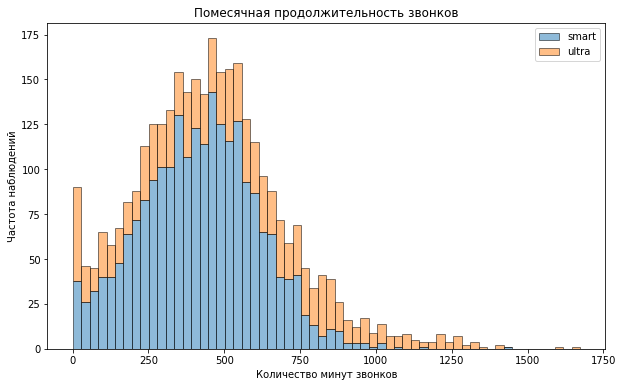

Среднее значение помесячной продолжительности звонков тарифа 'Смарт': 418 минут
Среднее значение помесячной продолжительности звонков тарифа 'Ультра': 527 минут


Медианное значение помесячной продолжительности звонков тарифа 'Смарт': 422 минут
Медианное значение помесячной продолжительности звонков тарифа 'Ультра': 518 минут


Дисперсия помесячной продолжительности звонков тарифа 'Смарт': 36203.07
Дисперсия помесячной продолжительности звонков тарифа 'Ультра': 100771.22


Стандартное отклонение помесячной продолжительности звонков тарифа 'Смарт': 190 минут
Стандартное отклонение помесячной продолжительности звонков тарифа 'Ультра': 317 минут


In [31]:
# построение гистограмм
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.hist([df_smart['calls_sum'], df_ultra['calls_sum']], label=['smart', 'ultra'],
         bins=60, stacked=True, alpha=0.5, edgecolor='black') # построение гистограмм
plt.legend() # вывод легенды
plt.title('Помесячная продолжительность звонков') # вывод названия гистограмм
plt.xlabel('Количество минут звонков') # вывод подписи оси x
plt.ylabel('Частота наблюдений') # вывод подписи оси y
plt.show()

print('Среднее значение помесячной продолжительности звонков тарифа \'Смарт\':', 
      round(df_smart['calls_sum'].mean()), 'минут')
print('Среднее значение помесячной продолжительности звонков тарифа \'Ультра\':', 
      round(df_ultra['calls_sum'].mean()), 'минут')
print('\n')
print('Медианное значение помесячной продолжительности звонков тарифа \'Смарт\':', 
      round(df_smart['calls_sum'].median()), 'минут')
print('Медианное значение помесячной продолжительности звонков тарифа \'Ультра\':', 
      round(df_ultra['calls_sum'].median()), 'минут')
print('\n')
print('Дисперсия помесячной продолжительности звонков тарифа \'Смарт\':', 
      round(np.var(df_smart['calls_sum']), 2))
print('Дисперсия помесячной продолжительности звонков тарифа \'Ультра\':', 
      round(np.var(df_ultra['calls_sum']), 2))
print('\n')
print('Стандартное отклонение помесячной продолжительности звонков тарифа \'Смарт\':', 
      round(np.std(df_smart['calls_sum'])), 'минут')
print('Стандартное отклонение помесячной продолжительности звонков тарифа \'Ультра\':', 
      round(np.std(df_ultra['calls_sum'])), 'минут')

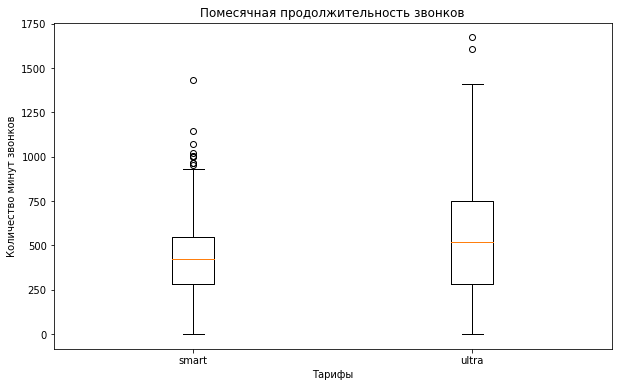

In [32]:
# построение диаграмм размаха
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.boxplot(x=[df_smart['calls_sum'], df_ultra['calls_sum']], 
            labels=['smart', 'ultra']) # построение диаграмм размаха
plt.title('Помесячная продолжительность звонков') # вывод названия гистаграмм
plt.xlabel('Тарифы') # вывод подписи оси x
plt.ylabel('Количество минут звонков') # вывод подписи оси y
plt.show()

Можно сделать вывод, что пользователям тарифа "Ультра" требуется большее количество минут звонков в месяц. Среднее значение, дисперсия и стандартное отклонение больше, распределение данных скошенно вправо. Распределение данных на тарифе "Смарт" близко к нормальному, значения среднего и медианы практически совпадают, присутствуют выбросы в большую сторону. Также присутствуют месяцы в которые не совершали звонков, это можно объяснить тем, что часть пользователей стали клиентами в течении года либо не совершали звонки в течении месяца либо перешли на другой тариф. Среднее значение помесячной продолжительности звонков пользователей тарифа "Смарт" близко количеству минут звонка, включенных в абонентскую плату. Это говорит о том, что этим пользователем характерно превышать лимиты.

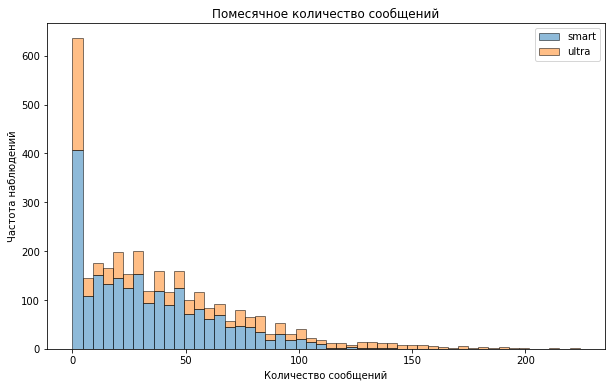

Среднее значение помесячного количества сообщений тарифа 'Смарт': 33
Среднее значение помесячного количества сообщений тарифа 'Ультра': 49


Медианное значение помесячного количества сообщений тарифа 'Смарт': 28
Медианное значение помесячного количества сообщений тарифа 'Ультра': 38


Дисперсия помесячного количества сообщений тарифа 'Смарт': 796.46
Дисперсия помесячного количества сообщений тарифа 'Ультра': 2282.95


Стандартное отклонение помесячного количества сообщений тарифа 'Смарт': 28
Стандартное отклонение помесячного количества сообщений тарифа 'Ультра': 48


In [33]:
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.hist([df_smart['messages_count'], df_ultra['messages_count']], label=['smart', 'ultra'],
         bins=50, stacked=True, alpha=0.5, edgecolor='black') # построение гистограмм
plt.legend() # вывод легенды
plt.title('Помесячное количество сообщений') # вывод названия гистограмм
plt.xlabel('Количество сообщений') # вывод подписи оси x
plt.ylabel('Частота наблюдений') # вывод подписи оси y
plt.show()

print('Среднее значение помесячного количества сообщений тарифа \'Смарт\':', 
      round(df_smart['messages_count'].mean()))
print('Среднее значение помесячного количества сообщений тарифа \'Ультра\':', 
      round(df_ultra['messages_count'].mean()))
print('\n')
print('Медианное значение помесячного количества сообщений тарифа \'Смарт\':', 
      round(df_smart['messages_count'].median()))
print('Медианное значение помесячного количества сообщений тарифа \'Ультра\':', 
      round(df_ultra['messages_count'].median()))
print('\n')
print('Дисперсия помесячного количества сообщений тарифа \'Смарт\':', 
      round(np.var(df_smart['messages_count']), 2))
print('Дисперсия помесячного количества сообщений тарифа \'Ультра\':', 
      round(np.var(df_ultra['messages_count']), 2))
print('\n')
print('Стандартное отклонение помесячного количества сообщений тарифа \'Смарт\':', 
      round(np.std(df_smart['messages_count'])))
print('Стандартное отклонение помесячного количества сообщений тарифа \'Ультра\':', 
      round(np.std(df_ultra['messages_count'])))

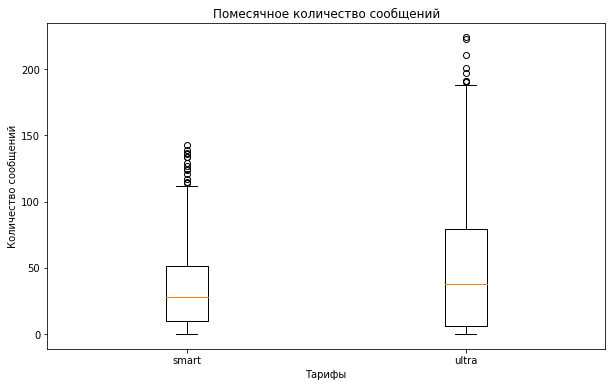

In [34]:
# построение диаграмм размаха
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.boxplot(x=[df_smart['messages_count'], df_ultra['messages_count']], 
            labels=['smart', 'ultra']) # построение диаграмм размаха
plt.title('Помесячное количество сообщений') # вывод названия диаграмм размаха
plt.xlabel('Тарифы') # вывод подписи оси x
plt.ylabel('Количество сообщений') # вывод подписи оси y
plt.show()

Можно сделать вывод, что пользователи тарифа "Ультра" отправляют большее количество сообщений в месяц. Среднее значение, дисперсия и стандартное отклонение больше. Есть большое количество месяцев в которые не отправляли сообщений, это можно объяснить тем, что в принципе услуга отправки сообщений не настолько популярна. Распределение данных на обоих тарифах сильно скошенно вправо, присутствуют выбросы в большую сторону. Среднее значение помесячного количества отправленных сообщений пользователей тарифа "Смарт" близко к количеству сообщений, включенных в абонентскую плату. Это говорит о том, что этим пользователем характерно превышать лимиты.

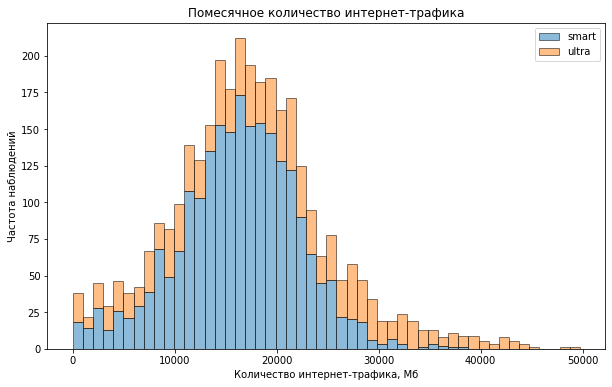

Среднее значение помесячного количества интернет-трафика тарифа 'Смарт': 16208 Мб
Среднее значение помесячного количества интернет-трафика тарифа 'Ультра': 19468 Мб


Медианное значение помесячного количества интернет-трафика тарифа 'Смарт': 16506 Мб
Медианное значение помесячного количества интернет-трафика тарифа 'Ультра': 19308 Мб


Дисперсия помесячного количества интернет-трафика тарифа 'Смарт': 34447076.5
Дисперсия помесячного количества интернет-трафика тарифа 'Ультра': 101647774.44


Стандартное отклонение помесячного количества интернет-трафика тарифа 'Смарт': 5869 Мб
Стандартное отклонение помесячного количества интернет-трафика тарифа 'Ультра': 10082 Мб


In [35]:
# построение гистограмм
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.hist([df_smart['mb_used'], df_ultra['mb_used']], label=['smart', 'ultra'],
         bins=50, stacked=True, alpha=0.5, edgecolor='black') # построение гистограмм
plt.legend() # вывод легенды
plt.title('Помесячное количество интернет-трафика') # вывод названия гистограмм
plt.xlabel('Количество интернет-трафика, Мб') # вывод подписи оси x
plt.ylabel('Частота наблюдений') # вывод подписи оси y
plt.show()

print('Среднее значение помесячного количества интернет-трафика тарифа \'Смарт\':', 
      round(df_smart['mb_used'].mean()), 'Мб')
print('Среднее значение помесячного количества интернет-трафика тарифа \'Ультра\':', 
      round(df_ultra['mb_used'].mean()), 'Мб')
print('\n')
print('Медианное значение помесячного количества интернет-трафика тарифа \'Смарт\':', 
      round(df_smart['mb_used'].median()), 'Мб')
print('Медианное значение помесячного количества интернет-трафика тарифа \'Ультра\':', 
      round(df_ultra['mb_used'].median()), 'Мб')
print('\n')
print('Дисперсия помесячного количества интернет-трафика тарифа \'Смарт\':', 
      round(np.var(df_smart['mb_used']), 2))
print('Дисперсия помесячного количества интернет-трафика тарифа \'Ультра\':', 
      round(np.var(df_ultra['mb_used']), 2))
print('\n')
print('Стандартное отклонение помесячного количества интернет-трафика тарифа \'Смарт\':', 
      round(np.std(df_smart['mb_used'])), 'Мб')
print('Стандартное отклонение помесячного количества интернет-трафика тарифа \'Ультра\':', 
      round(np.std(df_ultra['mb_used'])), 'Мб')

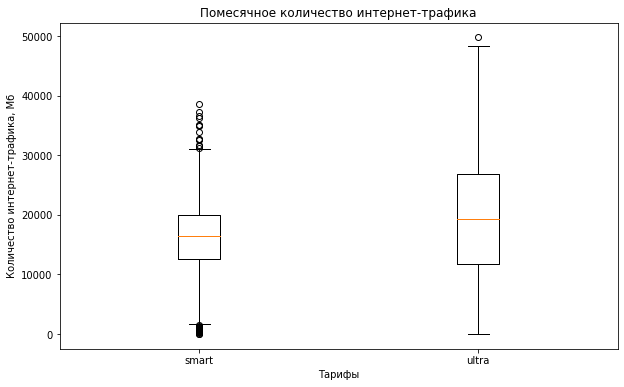

In [36]:
# построение диаграмм размаха
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.boxplot(x=[df_smart['mb_used'], df_ultra['mb_used']], 
            labels=['smart', 'ultra']) # построение диаграмм размаха
plt.title('Помесячное количество интернет-трафика') # вывод названия диаграмм размаха
plt.xlabel('Тарифы') # вывод подписи оси x
plt.ylabel('Количество интернет-трафика, Мб') # вывод подписи оси y
plt.show()

Можно сделать вывод, что пользователи тарифа "Ультра" тратят большее количество интернет-трафика в месяц. Среднее значение, дисперсия и стандартное отклонение больше, распределение данных скошенно вправо. Распределение данных на тарифе "Смарт" близко к нормальному, значения среднего и медианы практически совпадают, присутствуют выбросы как в большую сторону, так и в меньшую сторону. Среднее значение потраченного интернет-трафика пользователей тарифа "Смарт" больше количества интернет-трафика, включенного в абонентскую плату. Это говорит о том, что много пользователей этого тарифа превышает лимиты.

## Проверка гипотез

Нам необходимо проверить гипотезы:

    * средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
    * средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
    
Для начала нам необходимо сформулировать нулевую и альтернативную гипотезы для каждой из гипотез для их проверки.

### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

В данном конкретном случае нам необходимо сравнить среднее двух совокупностей между собой. Можно сформулировать гипотезы следующим образом:

    * H₀ - средняя выручка пользователей тарифов «Ультра» равна средней выручки пользователей тарифов «Смарт»;
    * H₁ - средняя выручка пользователей тарифов «Ультра» не равна средней выручки пользователей тарифов «Смарт».
    
Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha установим равным 0.05. Для начала нам необходимо проверить равны ли совокупности по размеру, чтобы установить параметр "равной дисперсии".

In [37]:
print('Совокупность данных пользователей тарифа \'Смарт\' больше совокупности данных пользователей тарифа \'Ультра\' в:',
      round((len(df_smart) / len(df_ultra)), 2), 'раз') # сравнение размеров совокупностей данных

Совокупность данных пользователей тарифа 'Смарт' больше совокупности данных пользователей тарифа 'Ультра' в: 2.26 раз


Так как размеры совокупностей разные, установим параметр `equal_var = False`.

In [38]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df_ultra['bill'], df_smart['bill'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Дополнительно построим диаграммы размаха, чтобы проверить результаты Т-теста.

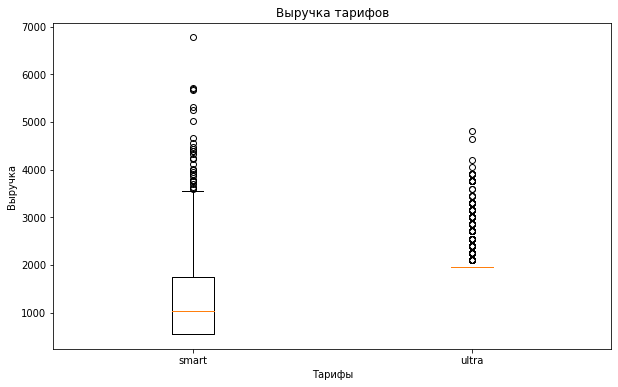

Медианное значение выручки тарифа 'Смарт': 1023.0
Медианное значение выручки тарифа 'Ультра': 1950.0


In [39]:
# построение диаграмм размаха
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.boxplot(x=[df_smart['bill'], df_ultra['bill']], 
            labels=['smart', 'ultra']) # построение диаграмм размаха
plt.title('Выручка тарифов') # вывод названия диаграмм размаха
plt.xlabel('Тарифы') # вывод подписи оси x
plt.ylabel('Выручка') # вывод подписи оси y
plt.show()
print('Медианное значение выручки тарифа \'Смарт\':', df_smart['bill'].median())
print('Медианное значение выручки тарифа \'Ультра\':', df_ultra['bill'].median())

По результатам теста видно, что полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно слишком мало, несмотря на различное количество потраченных денег за различные услуги. Следовательно, с вероятностью 99,9 % средняя выручка пользователей тарифов «Ультра» не равна средней выручки пользователей тарифов «Смарт». Медианные значения выручки по тарифам различаются почти в 2 раза. Если у пользователя подключен тариф «Смарт» с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета.

### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

В данном конкретном случае нам необходимо сравнить среднее двух совокупностей между собой. Можно сформулировать гипотезы следующим образом:

    * H₀ - средняя выручка пользователей из Москвы равна средней выручки пользователей из других регионов;
    * H₁ - средняя выручка пользователей из Москвы не равна средней выручки пользователей из других регионов.
    
Используем проверку гипотезы о равенстве средних двух генеральных совокупностей. Пороговое значение alpha установим равным 0.05. Для начала проверим значения дисперсий, чтобы установить параметр "равной дисперсии".

In [40]:
print('Дисперсия выручки пользователей из Москвы:', 
      round(np.var(df.loc[df['city'] == 'Москва', 'bill']), 2))
print('Дисперсия выручки пользователей из других регионов:', 
      round(np.var(df.loc[df['city'] != 'Москва', 'bill']), 2))

Дисперсия выручки пользователей из Москвы: 564710.71
Дисперсия выручки пользователей из других регионов: 653886.33


Так как дисперсии разные, установим параметр `equal_var = False`.

In [41]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df.loc[df['city'] == 'Москва', 'bill'], df.loc[df['city'] != 'Москва', 'bill'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


Дополнительно построим диаграммы размаха, чтобы проверить результаты Т-теста.

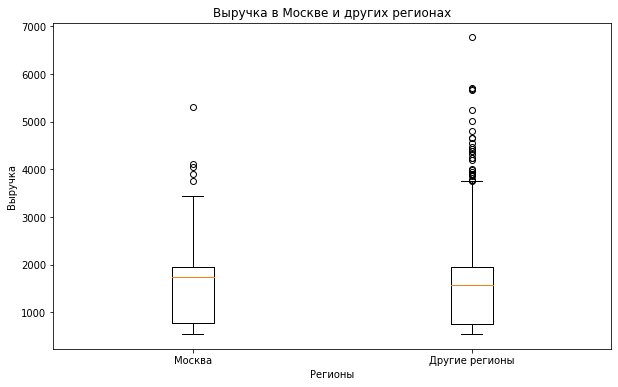

Медианное значение выручки пользователей из Москвы: 1750.0
Медианное значение выручки пользователей из других регионов: 1583.0


In [42]:
# построение диаграмм размаха
plt.figure(figsize=(10, 6)) # установление размера поля графика
plt.boxplot(x=[df.loc[df['city'] == 'Москва', 'bill'], df.loc[df['city'] != 'Москва', 'bill']], 
            labels=['Москва', 'Другие регионы']) # построение диаграмм размаха
plt.title('Выручка в Москве и других регионах') # вывод названия диаграмм размаха
plt.xlabel('Регионы') # вывод подписи оси x
plt.ylabel('Выручка') # вывод подписи оси y
plt.show()
print('Медианное значение выручки пользователей из Москвы:',
      df.loc[df['city'] == 'Москва', 'bill'].median())
print('Медианное значение выручки пользователей из других регионов:', 
      df.loc[df['city'] != 'Москва', 'bill'].median())

По результатам теста видно, что полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно велико, следовательно средняя выручка пользователей пользователей из Москвы, с вероятностью 37,2 % не отличается от средней выручки пользователей из других регионов.

## Выводы

Основной задачей исследования являлось исследование поведения пользователей двух тарифов «Смарт» и «Ультра» с целью выяснить какой из тарифов лучше. В результате анализа данных мы определили, что:

* пользователи тарифа «Ультра» совершают большее количество звонков, отправляют большее количество сообщений и используют большее количество интернет-трафика, чем пользователи тарифа «Смарт». Но пользователи тарифа «Ультра» редко превышают лимиты услуг, включенные в абонентсткую плату;
* для пользователей тарифа «Смарт» характерно превышение лимита услуг, включенных в абонетскую плату, соответственно им приходится доплачивать за услуги сверх лимита. В среднем абоненты доплачивают 473 рубля в месяц (+ 86 %);
* пользователи из Москвы трятят практически такое же количество денег (1750 рублей) на услуги связи, что и пользователи из других регионов (1583 рубля). Разница в 167 рублей статистически не значима;
* Средняя выручка пользователей тарифов «Ультра» (1950 рублей) больше средней выручки пользователей тарифов «Смарт» (1023 рубля), следовательно для компании более выгоден тариф «Ультра».